# **Synopsis: Capstone Project - NLP**

Firstly, Thanks to our mentor and study materials which has help us to understand and learn insight of basic python coding, Exploratory Data Analysis(EDA), text data pre-processing technique, machine learning algorithms, Neural Network and Sequencial Models. 

This Project scope covers deliverables as under,  

1) *Understanding of data types* and exploration of attributes interms of shape, size, missing values and unique values variables. Descriptive statistics of attributes and distribution pattern. Loading of dataset, converting data types to workable datatypes. 

2) *Univariate Analysis*: Identification of unique groups, callers and input language type contribution with respect to total dataset. Identification of outliers.

3) *Bi-variate Analysis*: Bi-variate analysis between the predictor variable and between the predictor variable and target variable. Inference on relationship study. Stratergies to address data popullation, outliers and missing values.

4) *Text Pre-processing*: 
 
Text preprocessing includes, Converted to characters to lower case, removal of hyperlinks,removal of Web link, removal of mail Id, expand text, removal of all the special characters and digits, removal of single characters, removal of extra spaces, Removal of stop words and tokenizion of words

5) Exploration of count based machine learning models, like Multinomial Naive Base, Decision tree, Random forest and others for attributes 'Short Description' and 'Description' seperately. 

6) Exploration of basic sequential models

**Dataset Understanding:**

To execute the above mentioned delivarables dataset is processed at multiple level the details of dataset with dataset name and its type of processing as under,

Dataset name&emsp;&emsp;&emsp;    Type of processing

df :&emsp;&emsp;&emsp;               _Originally provided dataset for study_

df1:&emsp;&emsp;&emsp;              _Removed outliers from dataset based on uni-variate and bi-variate analysis outcomes_  

df2:&emsp;&emsp;&emsp;              _Text preprocessing interms of removing impurity of text_

df3:&emsp;&emsp;&emsp;              _All the steps till df3 with only 'Description' attributes_

df4:&emsp;&emsp;&emsp;              _All the steps till df3 with onnly 'Short Description' attributes_



**Note:**

During Data Analysis it was observed that there are ticket information in non-English language like German, Spanish etc. Hence 3 new columns have been added to dataset for better data understanding, cleansing &  processing.

* **Cat_Short_Description** : Language used in Short Description column - English, German, Spanish, Other
* **Cat_Description** &emsp;&emsp;&emsp;: Language used in Description column - English, German, Spanish, Other
* **Final Category** &emsp;&emsp;&emsp;&nbsp; : This is derived from above two columns. Only if both the above columns are English the Final Category is English else it is the other Non-English language

##### Mount google drive to access required project files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#To change the current directory
os.chdir('/content/drive/My Drive/Capstone Project')

#To validate the current path again
path = os.getcwd()
print(path)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['concatenate', 'f', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


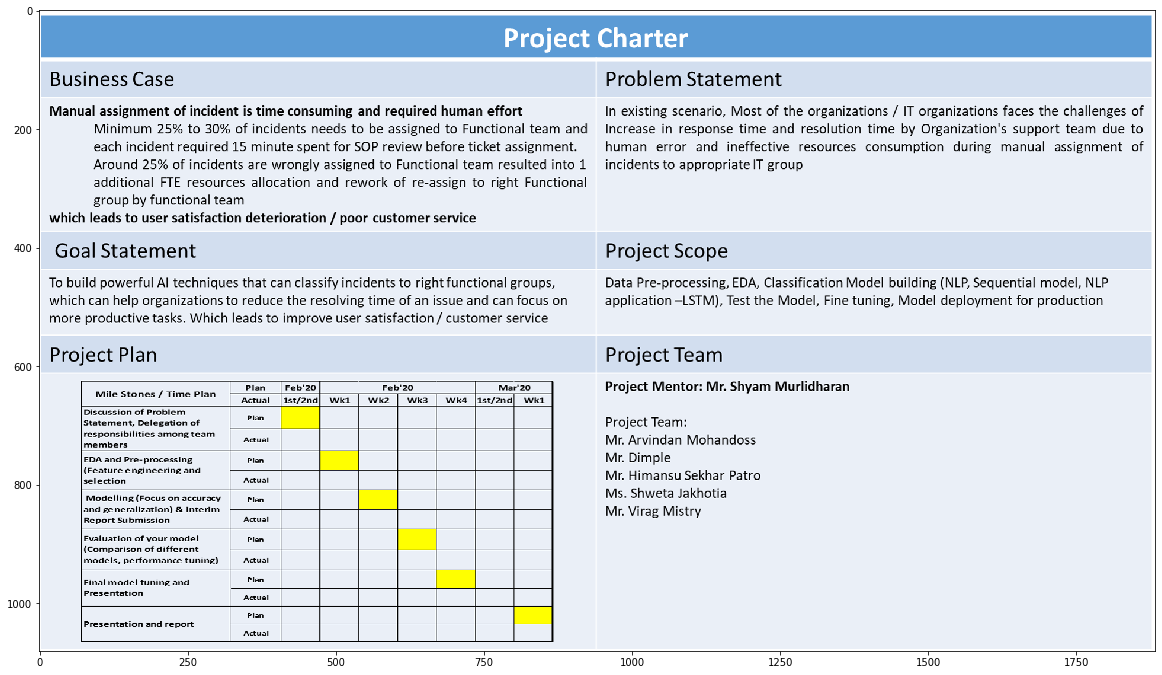

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Business_Case.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


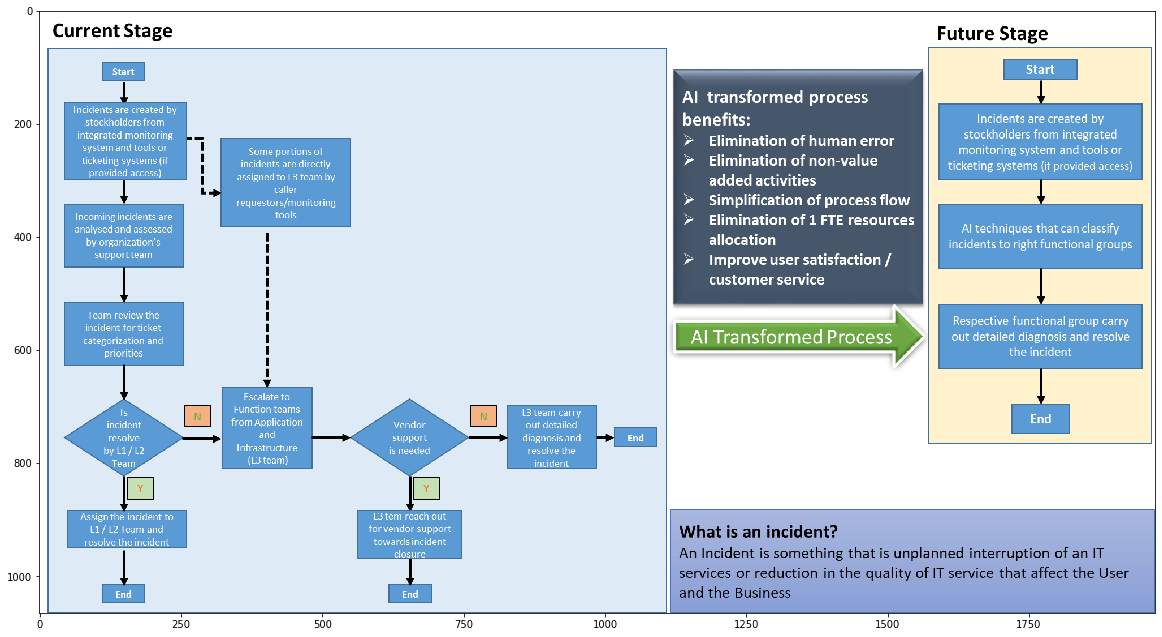

In [0]:
%pylab inline
import matplotlib.pyplot as plt
img = mpimg.imread('Process_Flow.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

In [0]:
!pip install contractions

### Importing Important Libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

UsageError: Line magic function `%` not found.


### Extract Dataset

In [34]:
df = pd.read_excel('Input_Data_Final.xlsx',encoding='latin-1') #to be deleted

In [ ]:
df = pd.read_excel('Input_Data_Final.xlsx')

In [0]:
# convert dataset to CSV format
df.to_csv('Input_Data_Final.csv')

In [0]:
#Read the csv converted dataset
df = pd.read_csv('Input_Data_Final.csv',encoding='latin-1') 
#encoding as latin-1 is used since the input data has text in many non-english languages
df.drop('Unnamed: 0',inplace=True,axis=1)

### Data Exploration

In [0]:
df.head() #check the top 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [29]:
df.tail() #check the bottom 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,English,English,English
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,English,English,English
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,English,English,English
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Spanish,English,Spanish
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,German,German,German


In [4]:
print('Dataset shape :', df.shape)
print('Dataset size  :',df.size)
print(df.info())

Dataset shape : (8500, 7)
Dataset size  : 59500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
Short description        8492 non-null object
Description              8499 non-null object
Caller                   8500 non-null object
Assignment group         8500 non-null object
Cat_Short_Description    8500 non-null object
Cat_Description          8500 non-null object
Final Category           8500 non-null object
dtypes: object(7)
memory usage: 465.0+ KB
None


In [33]:
df.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,8492,8499,8500,8500,8500,8500,8500
unique,7481,7817,2950,74,5,4,4
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,38,56,810,3976,8019,7986,7984


#### Identify null Value in input dataset

*From the below graph we can infer that less than 0.1% data has null values. Short Description has comparitively more null values than Description column*

These input records will be handled during data cleansing process

In [30]:
null_value = (df.isna().sum()/df.count().round(2))*100`

In [32]:
df.isna().sum()

Short description        8
Description              1
Caller                   0
Assignment group         0
Cat_Short_Description    0
Cat_Description          0
Final Category           0
dtype: int64

Text(0.5, 0, 'Table Features')

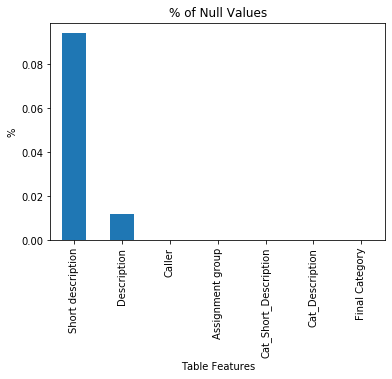

In [0]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

### <font color= 'blue'> Uni-variate Analysis</font>

#### 1.  Assignment Group - Various Functional Groups handing different category of incidents

From below we have derived that there are total 74 Unique Groups
* And from the below statistics we can observe that the dataset is not normally distributed. Almost 50% of the tickets are assigned to GROUP_0. Hence we can expect better prediction for Group_0 incident tickets when compared with other groups*

In [34]:
unique_group = df['Assignment group'].unique()
print('Unique Groups count: ',len(unique_group))
print('Unique Groups for assignment\n',unique_group)

Unique Groups count:  74
Unique Groups for assignment
 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [6]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [7]:
#Ticket count for each group
group_freq 

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [90]:
#getting cumulative distribution of tickets
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [21]:
from matplotlib.ticker import PercentFormatter

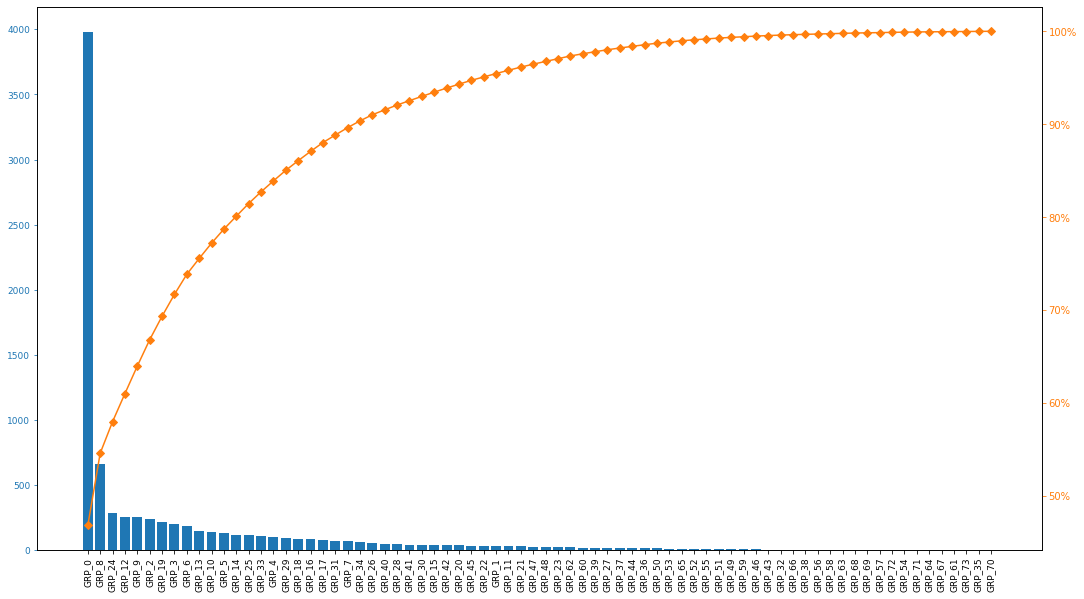

In [0]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

#### 2. Cat_Short_Description - Language used in Short Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Short Description record has incident ticket in English Language

In [13]:
sd_cat_freq_lang = df.groupby(df['Cat_Short_Description'])['Cat_Short_Description'].count().sort_values(ascending=False)
sd_cat_freq_lang = pd.DataFrame(sd_cat_freq_lang)

sd_cat_freq_lang['percentage of rec'] = sd_cat_freq_lang/df['Cat_Short_Description'].count()
sd_cat_freq_lang

,Cat_Short_Description,percentage of rec
Cat_Short_Description,,
English,8019,0.943412
German,415,0.048824
Other,53,0.006235
Spanish,12,0.001412
Null,1,0.000118


#### 3. Cat_Description - Language used in Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Description record has incident ticket in English Language

In [14]:
d_cat_freq_lang = df.groupby(df['Cat_Description'])['Cat_Description'].count().sort_values(ascending=False)
d_cat_freq_lang = pd.DataFrame(d_cat_freq_lang)
d_cat_freq_lang['percentage of rec'] = d_cat_freq_lang/df['Cat_Description'].count()
d_cat_freq_lang

,Cat_Description,percentage of rec
Cat_Description,,
English,7986,0.939529
German,450,0.052941
Other,53,0.006235
Spanish,11,0.001294


#### 4. Final Category - This is derived from above two columns. 
Only if both the above columns are English the Final Category is English else it is the other Non-English language

* From below analysis we can observe that almost more than 94% of Final Category record has incident ticket in English Language

In [35]:
unique_lang_category = df['Final Category'].unique()
print('Language detected in dataset',unique_lang_category)

Language detected in dataset ['English' 'German' 'Other' 'Spanish']


In [17]:
final_cat_freq_lang = df.groupby(df['Final Category'])['Final Category'].count().sort_values(ascending=False)
final_cat_freq_lang = pd.DataFrame(final_cat_freq_lang)
final_cat_freq_lang['percentage of rec'] = final_cat_freq_lang/df['Final Category'].count()
final_cat_freq_lang

,Final Category,percentage of rec
Final Category,,
English,7985,0.939412
German,451,0.053059
Other,53,0.006235
Spanish,11,0.001294


In [19]:
final_cat_freq_lang["cumpercentage"] = final_cat_freq_lang["Final Category"].cumsum()/final_cat_freq_lang["Final Category"].sum()*100

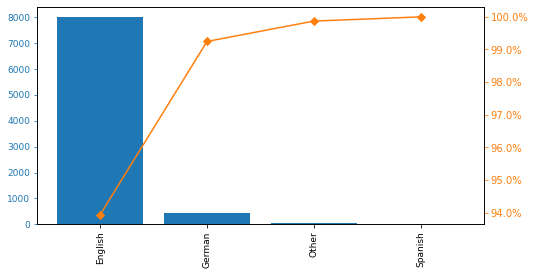

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(final_cat_freq_lang.index, final_cat_freq_lang["Final Category"], color="C0")
ax2 = ax.twinx()
ax2.plot(final_cat_freq_lang.index, final_cat_freq_lang["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

#### 5. Caller - Callers/Users raising the incident tickets

*From the below statistics we can observe that Caller "bpctwhsn kzqsbmtp" has raised majority of the tickets and out of 2950 unique callers top 1500 callers have contributed to more than 80% of the tickets registration*

In [36]:
print('Total Caller rec       :',len(df['Caller']))
print('Total unique Caller rec:',len(set(df['Caller'])))

Total Caller rec       : 8500
Total unique Caller rec: 2950


In [70]:
a = df['Caller'].unique()
#a = pd.DataFrame(a)
print("Unique Callers :",len(a))

Unique Callers : 2950


In [79]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [84]:
caller_freq.head(1500)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
wohzmlib fxwjhapo,1,82.89
woxrljif qymrszdk,1,82.91
wogicpdt jbdyzmhf,1,82.92


#### 6. Short Description - a short description for the raised incident ticket provided the user

<font color = 'red'> To add more analysis</font>

In [37]:
print('Total Short Description rec       :',len(df['Short description']))
print('Total unique Short Description rec:',len(set(df['Short description'])))

Total Short Description rec       : 8500
Total unique Short Description rec: 7482


#### 7. Description - a detailed description for the raised incident ticket provided the user

<font color = 'red'> To add more analysis</font>

In [38]:
print('Total Description rec       :',len(df['Description']))
print('Total unique Description rec:',len(set(df['Description'])))

Total Description rec       : 8500
Total unique Description rec: 7818


## <font color = 'blue'> Inference : EDA Part I - (Uni-Variate Analysis): </font>

1) Dataset contains total 8500 rows, attributes 'Short description' and 'Description' contains null values. Dataset contains total 7 coumns all has datatype as object.

2) There are total 74 unique groups(dependent attributes), 2950 unique callers and 4 unique languages into dataset.

3) There are less than 0.1% of null values(null input) into entire dataset. 

4) 'Assignment group' - GRP_0 contribute 46% of values into target attributes. It is indication that GRP_0 handles 46% of input tickets. Secondly, Contribution of many other Assignment group are less than 1%. 
Imbalace of target group observed and suggested to discussed with clients and request for futher data collection on other 'Assignment group', which will help to improve the accuracy level at group level while model building. There is high probability of getting low accuracy rate with provided dataset for those groups having very limited data point to train the model. 

5) 95% of input language identified as an English into dataset. As other languate contribution is less than 8 to 10%, other input language considered as an outlier and such data points are removed from dataset for futher study and model building. 

6) Only Caller: 'bpctwhsn kzqsbmtp' generates 10% of the total input tickets. It is indication of higher amount of multiple issues with single caller. There is not significant amount of contribution into total input tickets identified with all other callers. 


### Bi-Variate Analysis

#####  1. Assignment Group & Final Category (All Languages)

In [85]:
grp_lang = pd.crosstab(df['Assignment group'],df['Final Category'],normalize='index').round(5)*100

In [86]:
grp_lang

Final Category,English,German,Other,Spanish
Assignment group,,,,
GRP_0,97.309,2.666,0.000,0.025
GRP_1,100.000,0.000,0.000,0.000
GRP_10,97.143,2.857,0.000,0.000
GRP_11,96.667,3.333,0.000,0.000
GRP_12,89.883,9.728,0.389,0.000
...,...,...,...,...
GRP_71,100.000,0.000,0.000,0.000
GRP_72,100.000,0.000,0.000,0.000
GRP_73,100.000,0.000,0.000,0.000


##### 2. Assignment Group & Language Category  : 

From below graphs we can infer that :
* Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(German, Spanish and Others)
* GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)
* Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)
* GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset.

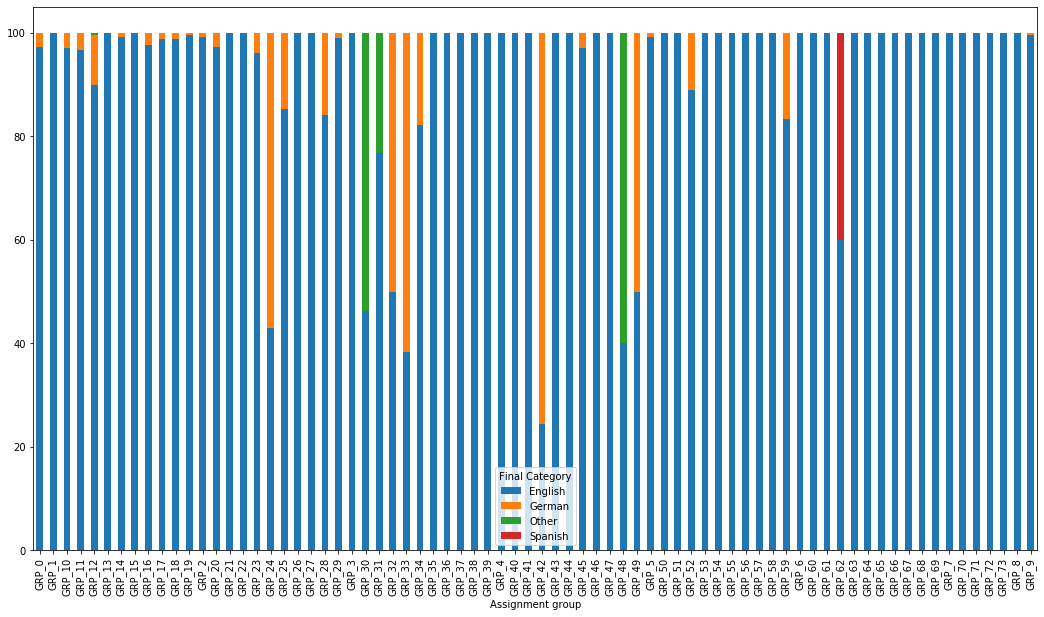

In [87]:
grp_lang.plot(kind='bar',stacked='True',figsize=(18,10))

In [93]:
group_freq["%_contri"] = group_freq["Assignment group"]/group_freq["Assignment group"].sum()*100

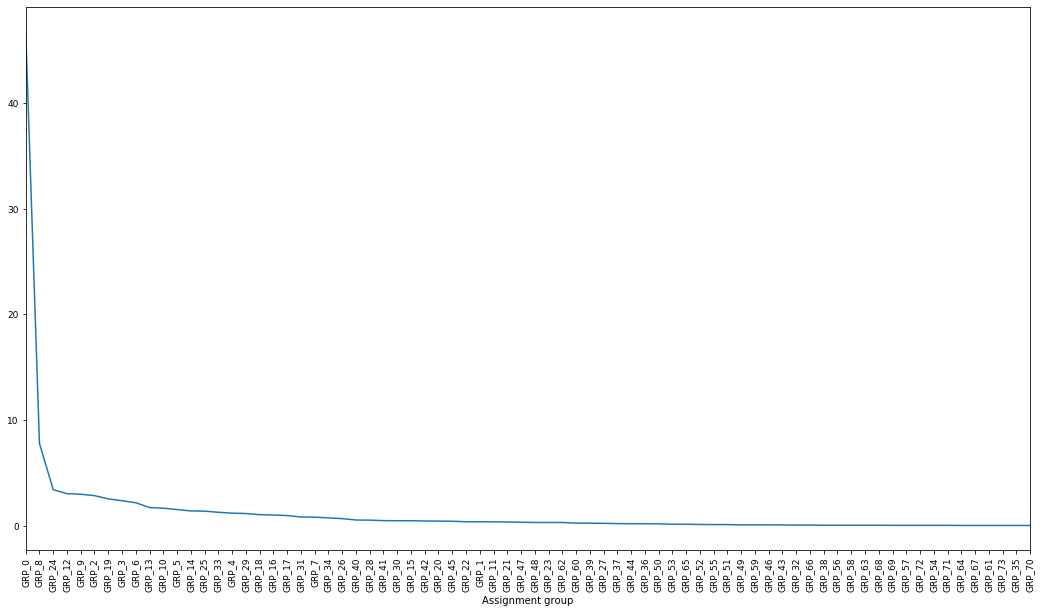

In [0]:
plt.xticks(range(0, 74))
group_freq["%_contri"].plot(kind='line',figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)

##### 3. Caller & Final Language Category (Language = German)

In [0]:
caller_grp = pd.crosstab(df['Final Category']=='German',df['Caller'])
caller_grp.T

Final Category,False,True
Caller,,
DEsowkrH sciejzNE,2,0
HdOuWxAt qfKdlJMx,1,0
ZkBogxib QsEJzdZO,151,0
abiuclvj brziktno,1,0
abtknpew ifcekjdb,1,0
...,...,...
zylaexnv pvkzbduh,3,0
zylwdbig wdkbztjp,1,0
zymdwqsi jzvbthil,1,0


# ????

In [0]:
a = df[df['Final Category']== 'German']  #?????

In [0]:
caller_freq = a.groupby(a['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
jionmpsf wnkpzcmv,16,3.55
vzqomdgt jwoqbuml,12,6.21
niptbwdq csenjruz,12,8.87
wrcktgbd wzrgyunp,8,10.64
xwirzvda okhyipgr,6,11.97
...,...,...
plfwoagd chtpiazu,1,99.11
pjrcbhln qznblemc,1,99.33
phedsjct lyphanue,1,99.56


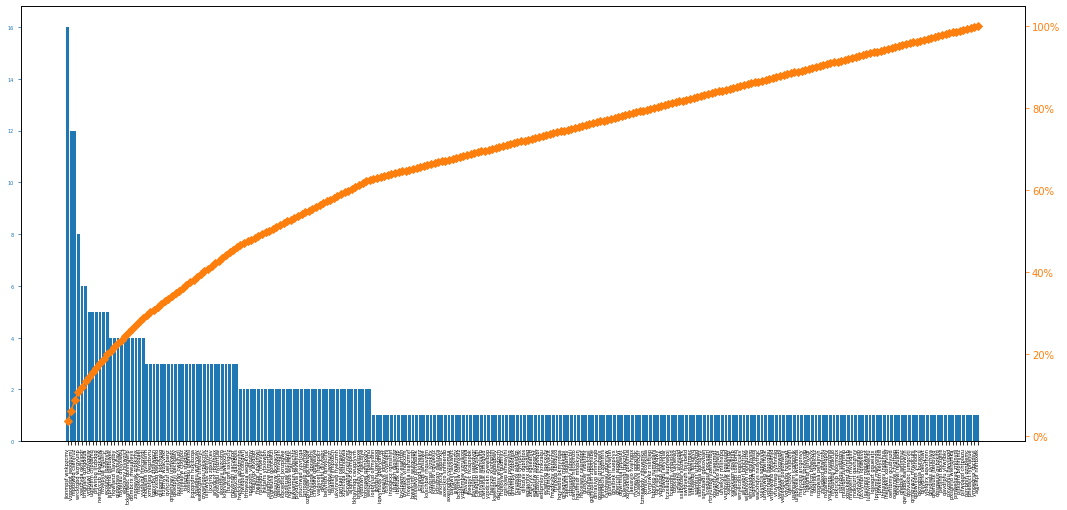

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=5)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Caller"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

# ???

In [0]:
caller_freq = a.groupby(a['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_24,165,36.59
GRP_0,106,60.09
GRP_33,66,74.72
GRP_42,28,80.93
GRP_12,25,86.47
GRP_25,17,90.24
GRP_34,11,92.68
GRP_28,7,94.24
GRP_10,4,95.12


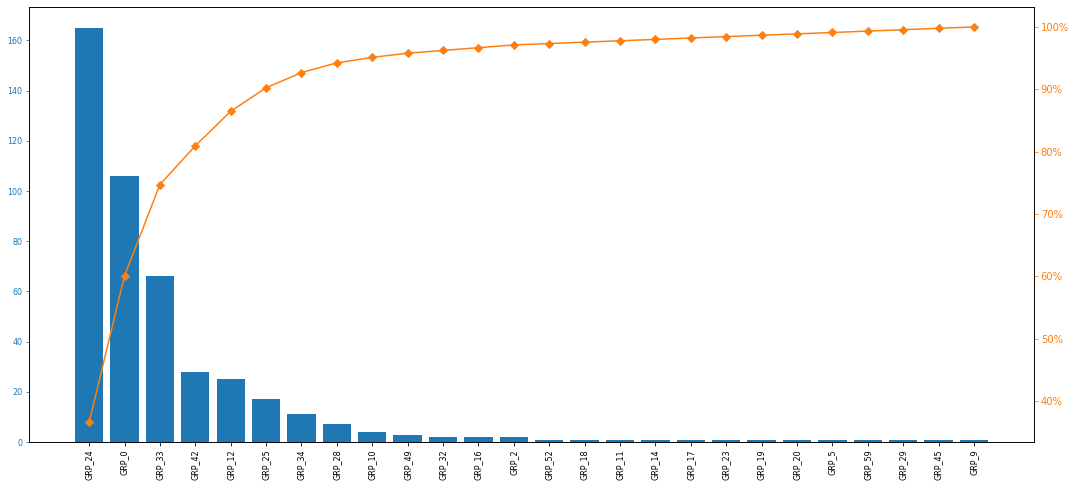

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
b = df[df['Final Category']== 'Other']

In [0]:
caller_freq = b.groupby(b['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
agyvbnwz mxsonkdc,3,5.66
kyagjxdh dmtjpbnz,3,11.32
xqyjztnm onfusvlz,2,15.09
hlrmufzx qcdzierm,2,18.87
zhpwcdea cboefuis,1,20.75
hbvwqine eakqyovu,1,22.64
kwpzbxvf cvuhoizx,1,24.53
ktghvuwr uwtakcmj,1,26.42
kclhqspo xvugztyc,1,28.30


In [0]:
caller_freq = b.groupby(b['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_30,21,39.62
GRP_31,16,69.81
GRP_48,15,98.11
GRP_12,1,100.00


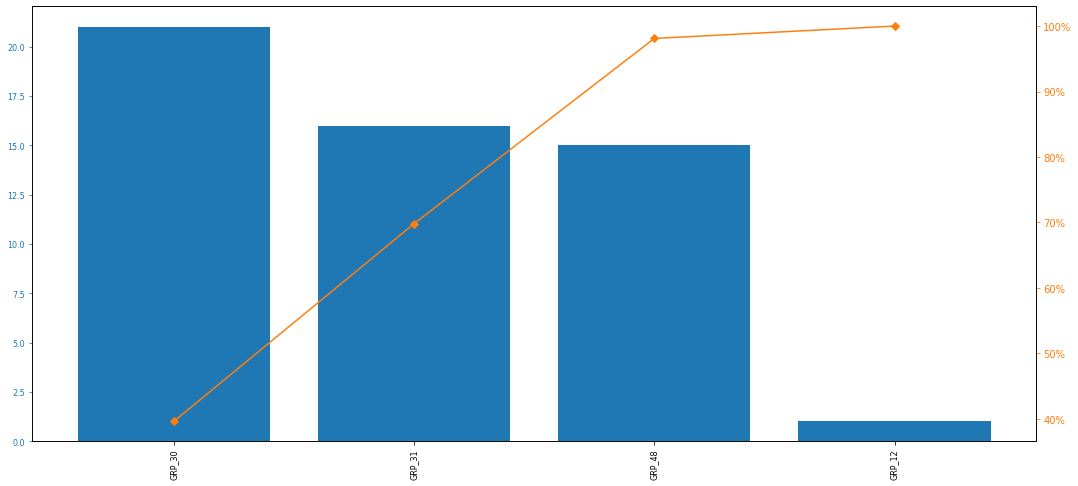

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [94]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [35]:
df1 = df.copy(deep=True)        # taking dataset backup before performing cleansing

In [36]:
df1.shape

(8500, 7)

## <font color = 'blue'> Inference : EDA Part II - (Bi-Variate Analysis): </font>

1) Input language Vs Assignment group study: Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(other languages like German, Spanish and Other)

2) GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)

3) Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)

4) GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset. 

5) Input language Vs Caller: There is no significant caller specific contribution into providing non english input text (other languages like German, Spanish, Other)

6) Input language Vs Assignment group: There is no significant Assignment group specific contribution into providing German, Spanish and Special character as an input into dataset. 


Based on all the above findings, 
As contribution of all these groups GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 are not more than 6% to total dataset. Additionally, there is no significant relationship with caller and input language texts. All non-english input texts considered as outliers and removed for futher study and model building. 

7) Right skewed distribution observed for number of word count for attribute 'Description' & 'Short Description', reflected with difference between mean and median values of number of word count. It is indication of number of sentence having higher amout of number of word counts into dataset. No of word count shall be explored while building sequential model building.  

## Data Cleansing

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Dropping records with non-english input

In [ ]:
df1.drop(df1[df1['Final Category'] != 'English'].index, inplace = True)
df1.shape

#### Word Counts before performing Data Cleansing


# why word count with no digit and stop word removal????

In [ ]:
df1['Desc_word_count'] = df1['Description'].str.split().map(len)
df1['Short_desc_word_count'] = df1['Short description'].str.split().map(len)
df1.head()

In [ ]:
print(df1['Desc_word_count'].describe())
print(np.percentile(df1['Desc_word_count'],90))
print(np.percentile(df1['Desc_word_count'],95))

In [ ]:
print(df1['Short_desc_word_count'].describe())
print(np.percentile(df1['Short_desc_word_count'],90))
print(np.percentile(df1['Short_desc_word_count'],95))

In [28]:
#????
df1['Desc_no_stp_wrd'] = df1['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df1['Short_no_stp_wrd'] = df1['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df1['Desc_no_dgt'] = df1['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
df1['Shrt_Desc_no_dgt'] = df1['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [0]:
print('Description word count      :',df1['Desc_word_count'].sum())
print('Short Description word count:',df1['Short_desc_word_count'].sum())

print('Description word count with no digits           :',df1['Desc_no_dgt'].sum())
print('Short Description word count with no digits     :',df1['Shrt_Desc_no_dgt'].sum())

print('Description word count after stop word re     :',df1['Desc_no_stp_wrd'].sum())
print(df1['Short_no_stp_wrd'].sum())


221121
55872
113542
27666
59971
13040


In [37]:
df2 = df1.copy(deep = 'True') #Used for preprocessing of text

In [40]:
df2.drop(['Desc_word_count','Short_desc_word_count','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt','Cat_Short_Description','Cat_Description','Final Category'],axis=1,inplace=True)

In [38]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8500 non-null object
Description          8500 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df2['Short description'][7]  #daat before cleaning

In [ ]:
df2['Description'][1]       # data before claensing

In [42]:
#Common function for text cleaning

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    clean        = re.compile('<.*?>')                            
    rem_hyper    = re.sub(clean, '',sentence_low)                              #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_spcl     = re.sub("([^\x00-\x7F])+"," ",rem_num)                       #Remove special CHar
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_spcl)                     #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    
    tokenizer    = RegexpTokenizer(r'\w+')
    text_token   = tokenizer.tokenize(rem_spa)                                #Text tokenized  
    filter_words = [w for w in text_token if len(w) > 2 if not w in stopwords.words('english')] #Remove stop words                   
    word_lemma   = [lemmatizer.lemmatize(w) for w in filter_words]            #Word Lemmatization
    clean_text   = word_lemma
    return " ".join(clean_text)  

In [43]:
df2['Short description'] = df2['Short description'].map(lambda x:preprocess(x))
df2['Description'] = df2['Description'].map(lambda x:preprocess(x))

In [31]:
df2['Short description'][7]  # data after cleansing

NameError: name 'df2' is not defined

In [ ]:
df1['Description'][1] # data after cleansing

In [0]:
df2.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb komuaywn,GRP_0
2,can not log in to vpn,received from hi cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event critical hostname company com the value ...,event critical hostname company com the value ...,jyoqwxhz clhxsoqy,GRP_1
7,ticket no employment status new non employee [...,ticket no employment status new non employee [...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0


In [0]:
df2.describe()

,Short description,Description,Caller,Assignment group
count,7985,7985,7985,7985
unique,5922,6243,2772,74
top,job job failed in job scheduler at,received from job job failed in job scheduler at,bpctwhsn kzqsbmtp,GRP_0
freq,469,462,810,3869


# Word count after cleansing ??

In [48]:
df2['Description'] = df2['Description'].astype(str)    #??? is it required
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
#from nltk.tokenize import word_tokenize
#df3['Description'] = [word_tokenize(i) for i in df3['Description']]
#df3['Short description'] = [word_tokenize(i) for i in df3['Short description']]

In [60]:
#df3.head()

In [0]:
#df3['Description']= df3['Description'].apply(lambda x: [item for item in x if item not in stop_words])
#df3['Short description']= df3['Short description'].apply(lambda x: [item for item in x if item not in stop_words])  

In [0]:
#df3.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, hello, team, meetings, skype, meeti...",hmjdrvpb komuaywn,GRP_0
2,"[log, vpn]","[received, hi, log, vpn, best]",eylqgodm ybqkwiam,GRP_0
3,"[unable, access, hr, tool, page]","[unable, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [53]:
df2['Desc_word_count'] = df2['Description'].str.split().map(len)
df2['Short_desc_word_count'] = df2['Short description'].str.split().map(len)
print(df2.describe())
print(np.percentile(df2['Desc_word_count'],90))
print(np.percentile(df2['Desc_word_count'],95))

       Desc_word_count  Short_desc_word_count
count      7985.000000            7985.000000
mean         16.478773               4.923732
std          37.214492               2.516841
min           1.000000               1.000000
25%           4.000000               3.000000
50%           7.000000               5.000000
75%          17.000000               6.000000
max         759.000000              18.000000
33.0
54.0


In [0]:
#df3['Desc_no_stp_wrd'] = df3['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
#df3['Short_no_stp_wrd'] = df3['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
#df3['Desc_no_dgt'] = df3['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
#df3['Shrt_Desc_no_dgt'] = df3['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [59]:
# print(df3['Desc_word_count'].sum())
# print(df3['Short_desc_word_count'].sum())

# # print(df3['Desc_no_dgt'].sum())
# # print(df3['Shrt_Desc_no_dgt'].sum()) # To be discussed with team

# # print(df3['Desc_no_stp_wrd'].sum())
# # print(df3['Short_no_stp_wrd'].sum())

print(df2['Desc_word_count'].sum())
print(df2['Short_desc_word_count'].sum())

131583
39316


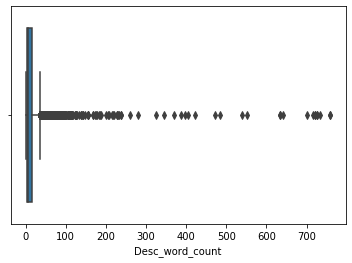

In [56]:
sns.boxplot(df2['Desc_word_count'])

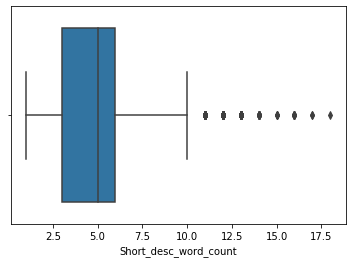

In [57]:
sns.boxplot(df2['Short_desc_word_count'])

In [46]:
df4 = df2.copy(deep=True)
df5 = df2.copy(deep=True)

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8500 non-null object
Description          8500 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
# df4.drop(['Desc_word_count','Short_desc_word_count','Short description','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)
# df5.drop(['Desc_word_count','Description','Short_desc_word_count','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)

In [45]:
df4.drop(['Desc_word_count','Short_desc_word_count','Short description','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)
df5.drop(['Desc_word_count','Description','Short_desc_word_count','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)

NameError: name 'df4' is not defined


# Approach for model building ???
